In [23]:
%matplotlib inline
import json
import requests
import seaborn as sns
import re
import numpy as np
import pandas as pd 
from lxml.html import fromstring

In [52]:
%%html
<blockquote class="twitter-tweet" data-lang="en"><p lang="en" dir="ltr">This is an actual story on an official government website with a 14-word headline starting with &quot;we must secure&quot;. This is not an accident. There are actual Nazis-who-call-themselves-Nazis at DHS. <a href="https://t.co/Q01TRRpNaI">https://t.co/Q01TRRpNaI</a></p>&mdash; Laurie Voss (@seldo) <a href="https://twitter.com/seldo/status/1012411506305036288?ref_src=twsrc%5Etfw">June 28, 2018</a></blockquote>
<script async src="https://platform.twitter.com/widgets.js" charset="utf-8"></script>


In [2]:
!mkdir -p data

# Collect SERPS

In [3]:
paginator = "https://www.dhs.gov/news-releases/press-releases?page={}"

with open("data/serps.jsonl", "w") as fp:
    for page_id in range(35):
        print(page_id)
        url = paginator.format(page_id)
        resp = requests.get(url)
        src = resp.text
        line = json.dumps({'url': url, 'src': src}) + "\n"
        fp.write(line)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34


# Get releases

In [4]:
hrefs = set()

with open("data/serps.jsonl") as fp:
    for line in fp:
        rec = json.loads(line)
        doc = fromstring(rec['src'])
        hrefs.update(doc.xpath("//a[contains(@href,'/news/2018')]/@href"))
        
urls = sorted(["https://www.dhs.gov" + href for href in hrefs])
urls[:10]

['https://www.dhs.gov/news/2018/01/03/secretary-nielsen-tours-wildfire-devastation-california',
 'https://www.dhs.gov/news/2018/01/04/update-your-system-now-protect-yourself-against-known-cyber-vulnerabilities',
 'https://www.dhs.gov/news/2018/01/08/secretary-homeland-security-kirstjen-m-nielsen-announcement-temporary-protected',
 'https://www.dhs.gov/news/2018/01/09/dhs-acting-press-secretary-statement-december-border-apprehension-numbers',
 'https://www.dhs.gov/news/2018/01/10/secretary-nielsen-statement-introduction-goodlatte-mccaul-bill',
 'https://www.dhs.gov/news/2018/01/11/statement-secretary-kirstjen-m-nielsen-human-trafficking-awareness',
 'https://www.dhs.gov/news/2018/01/14/deferred-action-childhood-arrivals-response-january-2018-preliminary-injunction',
 'https://www.dhs.gov/news/2018/01/16/dhs-doj-report-three-out-four-individuals-convicted-international-terrorism-and',
 'https://www.dhs.gov/news/2018/01/18/privacy-incident-involving-dhs-oig-case-management-system-update',

In [5]:
with open("data/releases.jsonl", "w") as fp:
    for url in urls:
        print(url)
        src = requests.get(url).text
        line = json.dumps({'url': url, 'src': src}) + "\n"
        fp.write(line)

https://www.dhs.gov/news/2018/01/03/secretary-nielsen-tours-wildfire-devastation-california
https://www.dhs.gov/news/2018/01/04/update-your-system-now-protect-yourself-against-known-cyber-vulnerabilities
https://www.dhs.gov/news/2018/01/08/secretary-homeland-security-kirstjen-m-nielsen-announcement-temporary-protected
https://www.dhs.gov/news/2018/01/09/dhs-acting-press-secretary-statement-december-border-apprehension-numbers
https://www.dhs.gov/news/2018/01/10/secretary-nielsen-statement-introduction-goodlatte-mccaul-bill
https://www.dhs.gov/news/2018/01/11/statement-secretary-kirstjen-m-nielsen-human-trafficking-awareness
https://www.dhs.gov/news/2018/01/14/deferred-action-childhood-arrivals-response-january-2018-preliminary-injunction
https://www.dhs.gov/news/2018/01/16/dhs-doj-report-three-out-four-individuals-convicted-international-terrorism-and
https://www.dhs.gov/news/2018/01/18/privacy-incident-involving-dhs-oig-case-management-system-update
https://www.dhs.gov/news/2018/01/19

https://www.dhs.gov/news/2018/06/06/statement-dhs-press-secretary-may-border-numbers
https://www.dhs.gov/news/2018/06/07/departments-justice-and-homeland-security-release-quarterly-alien-incarceration
https://www.dhs.gov/news/2018/06/07/dhs-receives-grade-sba-annual-small-business-procurement-scorecard
https://www.dhs.gov/news/2018/06/07/secretary-kirstjen-m-nielsen-meets-honduran-president-juan-orlando-hern-ndez
https://www.dhs.gov/news/2018/06/08/secretary-kirstjen-m-nielsen-travel-israel
https://www.dhs.gov/news/2018/06/12/dhs-announces-strengthened-northern-border-strategy
https://www.dhs.gov/news/2018/06/12/secretary-nielsen-receives-operational-briefing-israeli-security-technology-delivers
https://www.dhs.gov/news/2018/06/13/secretary-kirstjen-m-nielsen-meets-israeli-prime-minister-benjamin-netanyahu
https://www.dhs.gov/news/2018/06/15/fact-sheet-zero-tolerance-immigration-prosecutions-families
https://www.dhs.gov/news/2018/06/18/dhs-secretary-nielsens-remarks-illegal-immigration

# Analysis

In [2]:
docs, srcs = [], []

with open("data/releases.jsonl") as fp:
    for line in fp:
        src = json.loads(line)['src']
        srcs.append(src)
        docs.append(fromstring(src))

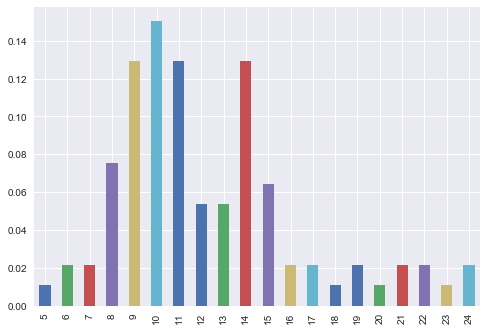

In [3]:
headers = []
for doc in docs:
    for header in doc.xpath("//header/h1/text()"):
        headers.append(header)
title_lens = [len(h.split(" ")) for h in headers]
title_lens = pd.Series(title_lens).value_counts().sort_index()
(title_lens / len(headers)).plot(kind='bar');

In [4]:
fourteens = [header for header in headers if len(header.split(" ")) == 14]
fourteens

['DHS Announces Additional, Enhanced Security Procedures for Refugees Seeking Resettlement in the United States',
 'Secretary Of Homeland Security Kirstjen M. Nielsen Announcement On Temporary Protected Status For Syria',
 'To Make America Safe Again, We Must End Sanctuary Cities and Remove Criminal Aliens',
 'We Must Secure The Border And Build The Wall To Make America Safe Again',
 "Readout of Secretary Kirstjen M. Nielsen's Meeting with Guatemalan Minister of Government Enrique Degenhart",
 'Secretary of Homeland Security Kirstjen M. Nielsen Statement on Cybersecurity for the Nation’s Election',
 'Secretary Kirstjen M. Nielsen Statement on the Retirement of Deputy Secretary Elaine C. Duke',
 'Readout of Secretary Kirstjen M. Nielsen’s Meeting with EU Counter-Terrorism Coordinator Gilles de Kerchove',
 'Readout of Secretary Kirstjen M. Nielsen’s Day One Meetings at the G7 Security Ministerial',
 'Readout of Secretary Kirstjen M. Nielsen’s Day Two Meetings at the G7 Security Ministeri

In [22]:
eighty_eights = []

with open("data/releases.jsonl") as fp:
    for line in fp:
        rec = json.loads(line)
        src = rec['src']
        doc = fromstring(src)
        if "Official website of the Department of Homeland Security" not in src:
            continue
            
        url = rec['url']
        article = doc.cssselect("article .field-name-body")[0].text_content()
        article = article.lower()
        for k in [' 88 ', ' eighty-eight ', ' eighty eight ']:
            if k in article:
                print(k, url)

 88  https://www.dhs.gov/news/2018/02/15/we-must-secure-border-and-build-wall-make-america-safe-again


In [48]:
test_str = "out of 88 claims that pass the credible fear screening, fewer than 13"
OUT_OF_RE = re.compile("out of \d[0-9,\.]+.*?\d[0-9,\.]+", re.I)
OUT_OF_RE.findall(test_str)

['out of 88 claims that pass the credible fear screening, fewer than 13']

In [51]:
out_ofs = []


with open("data/releases.jsonl") as fp:
    for line in fp:
        rec = json.loads(line)
        src = rec['src']
        doc = fromstring(src)
        if "Official website of the Department of Homeland Security" not in src:
            continue
            
        url = rec['url']
        article = doc.cssselect("article .field-name-body")[0].text_content()
        article = article.lower()
        out_ofs.extend(OUT_OF_RE.findall(article))
        
out_ofs

['out of 88 claims that pass the credible fear screening, fewer than 13']